In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 

In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()
#(50000, 3072), (50000), (10000,32,32,3)

169001437/169001437 [==============================] - 11s 0us/step


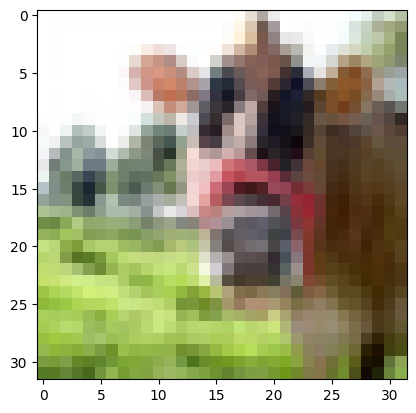

This is:  [19]


In [3]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("This is: ", train_labels[0])

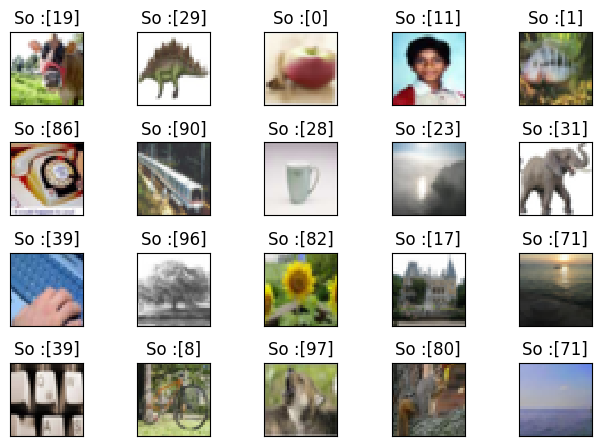

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Sequential()

model.add(Dense(4096, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(2048, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 100)               204900    
                                                                 
Total params: 21,182,564
Trainable params: 21,182,564
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

In [7]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [8]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [ ]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 30, batch_size= 1000)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
50/50 [==============================] - 126s 3s/step - loss: 3.5493 - accuracy: 0.1702
Epoch 2/30
50/50 [==============================] - 129s 3s/step - loss: 3.3857 - accuracy: 0.1933
Epoch 3/30
50/50 [==============================] - 126s 3s/step - loss: 3.3386 - accuracy: 0.1991
Epoch 4/30
50/50 [==============================] - 127s 3s/step - loss: 3.2869 - accuracy: 0.2076
Epoch 5/30
50/50 [==============================] - 127s 3s/step - loss: 3.2364 - accuracy: 0.2159
Epoch 6/30
50/50 [==============================] - 127s 3s/step - loss: 3.1895 - accuracy: 0.2247
Epoch 7/30
36/50 [====================>.........] - ETA: 37s - loss: 3.1343 - accuracy: 0.2345

In [13]:
model.save('cifar100.h5')

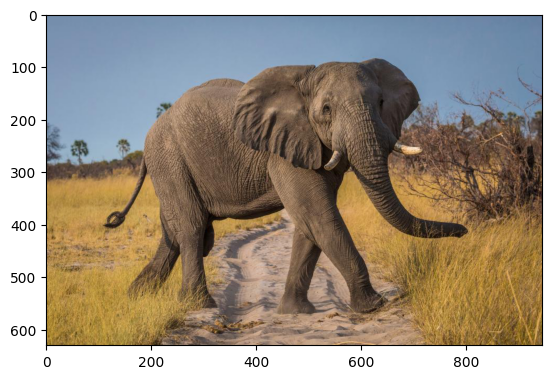

In [15]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab Notebooks/AI_Projects/Data/elephant.jpg')
imshow(img)

In [16]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/AI_Projects/Data/elephant.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 103ms/step


array([15])